### **Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. All patients here are females at least 21
years old of Pima Indian heritage.

The datasets consist of several medical predictor variables and one target variable, Outcome.
Predictor variables include the number of pregnancies the patient has had, their BMI, insulin
level, age, and so on.


# **Task 1**

#### **1. Visualize the data (scatterplot).**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


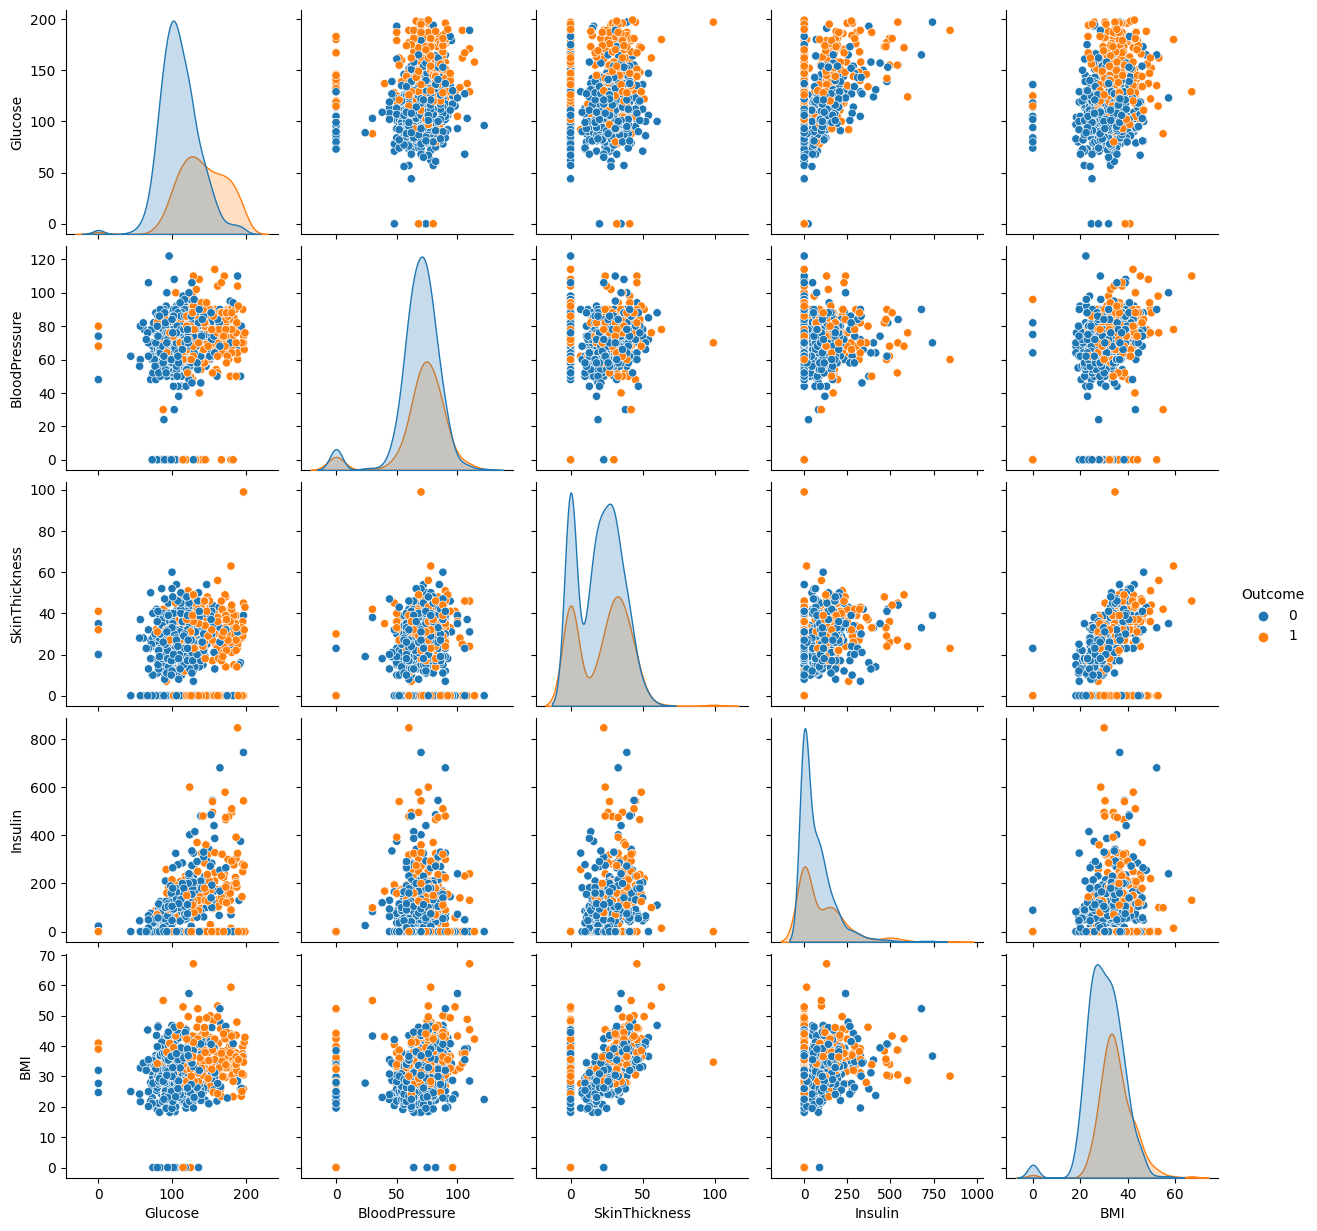

In [ ]:
import seaborn as sns
sns.pairplot(data,vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], hue = 'Outcome')
plt.show()

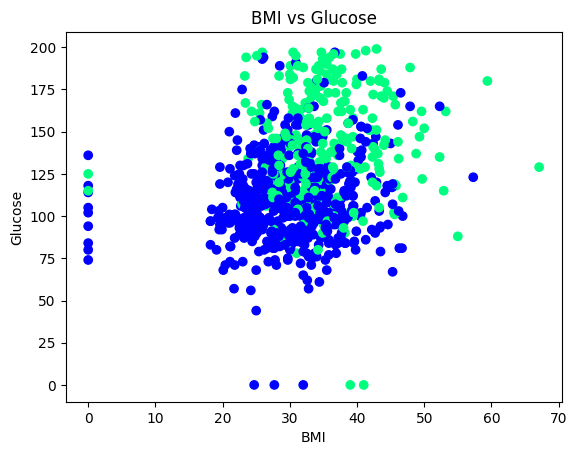

In [ ]:
plt.scatter(data['BMI'], data['Glucose'], c=data['Outcome'], cmap='winter')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('BMI vs Glucose')
plt.show()

#### **2. Split the data (80/20).**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

#### **3. Train the SVM model on the test data. Use 5-fold cross-validation method to find the best value for C parameter.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {'C': [1, 10, 100, 1000]}

svm_model = svm.SVC(kernel='linear')
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best value for C: ", grid_search.best_params_['C'])

Best value for C:  1


#### **4. Plot C parameters with Accuracy scores.**

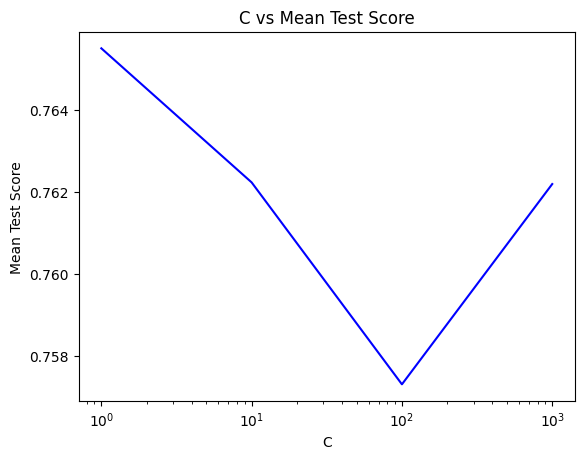

In [ ]:
import matplotlib.pyplot as plt

results = grid_search.cv_results_

plt.plot(param_grid['C'], results['mean_test_score'], color='blue')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('C vs Mean Test Score')
plt.show()

#### **5. Predict on the test data.**

In [ ]:
best_svm_clf = grid_search.best_estimator_

y_pred = best_svm_clf.predict(X_test)

#### **6. Evaluate the model (Accuracy, Precision, Recall).**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))

Accuracy =  0.7532467532467533
Precision =  0.6545454545454545
Recall =  0.6545454545454545


#### **7. Explain and comment on your results.**

The output of the code demonstrates that 1 is the ideal value for the C parameter. The accuracy of the model grows as C increases, up to a point, after which the accuracy starts to deteriorate. This is seen by the plot of C values with Accuracy scores. This is to be expected since raising C makes it possible for the model to fit the data more precisely. However, if C is set too high, the model may overfit the training data and perform badly on the test data.

On the test data, the SVM model obtains a 75% accuracy which means that it correctly classified 75% of the instances in the test set. The precision of the classifier was around 65%, which means that out of all the instances that the classifier predicted as positive, 65% of them were actually positive. The recall of the classifier was around 65%, which means that out of all the actual positive instances, the classifier correctly identified 65% of them.

The SVM model achieved good accuracy and recall scores, indicating that it can accurately predict whether a patient has diabetes or not. However, the precision score was relatively low, indicating that the model may have false positive predictions. We can further tune the model's parameters and try different algorithms to improve the precision score.

# **Task 2**

#### **1. Visualize the data (scatterplot).**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


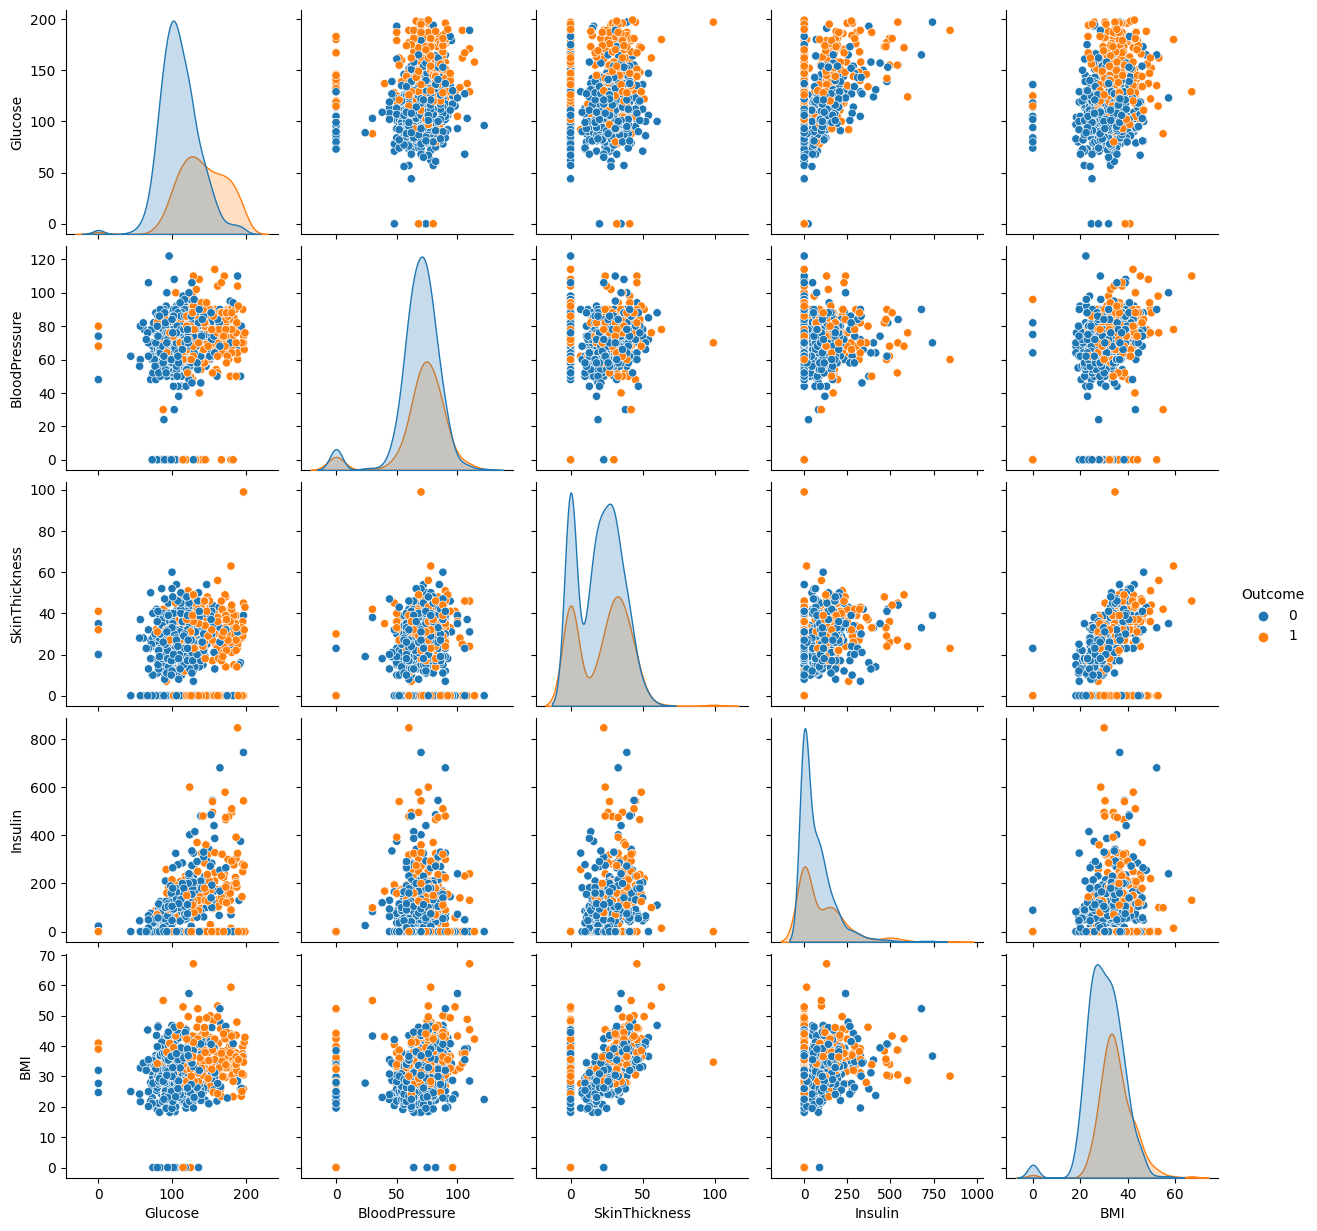

In [ ]:
import seaborn as sns

sns.pairplot(data,vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], hue = 'Outcome')
plt.show()

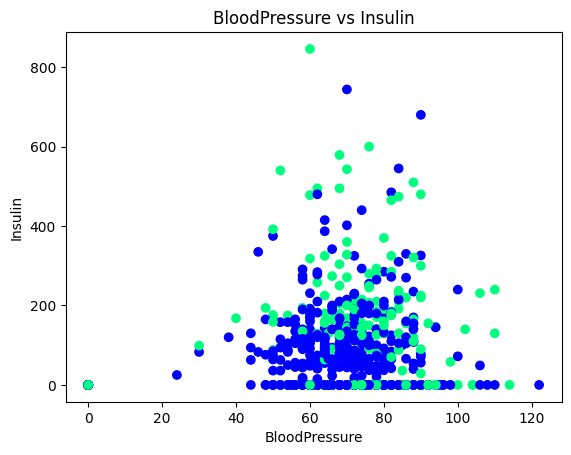

In [ ]:
plt.scatter(data['BloodPressure'], data['Insulin'], c=data['Outcome'], cmap='winter')
plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.title('BloodPressure vs Insulin')
plt.show()

#### **2. Split the data (80/20).**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [ ]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

#### **3. Train the KNN model on the test data. Use 5-fold cross-validation method to find the best value for K.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [75, 77, 1, 3, 6, 12]}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best value for K = ", grid_search.best_params_['n_neighbors'])

Best value for K =  12


#### **4.Plot K values with Accuracy scores.**

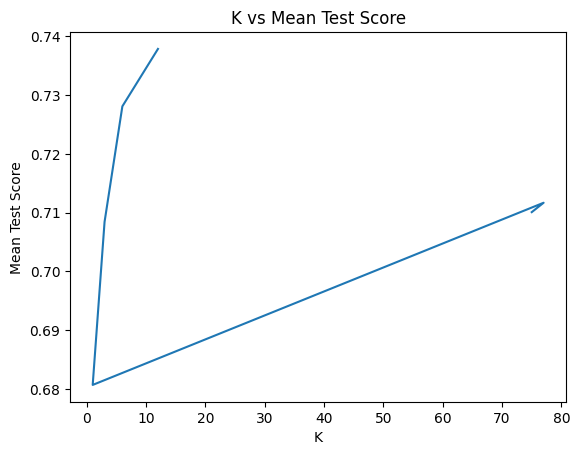

In [ ]:
import matplotlib.pyplot as plt

results = grid_search.cv_results_

plt.plot(param_grid['n_neighbors'], results['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Mean Test Score')
plt.title('K vs Mean Test Score')
plt.show()

In [ ]:
pd.DataFrame(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004516,0.000706,0.011225,0.000499,75,{'n_neighbors': 75},0.666667,0.780488,0.715447,0.682927,0.704918,0.710089,0.039076,4
1,0.003645,0.000090,0.010415,0.000199,77,{'n_neighbors': 77},0.666667,0.796748,0.715447,0.691057,0.688525,0.711689,0.045251,3
2,0.003956,0.000582,0.008522,0.000449,1,{'n_neighbors': 1},0.707317,0.707317,0.699187,0.666667,0.622951,0.680688,0.032529,6
3,0.003838,0.000160,0.008571,0.000162,3,{'n_neighbors': 3},0.723577,0.723577,0.699187,0.707317,0.688525,0.708437,0.013724,5
4,0.003763,0.000080,0.008850,0.000317,6,{'n_neighbors': 6},0.682927,0.747967,0.715447,0.715447,0.778689,0.728095,0.032603,2
5,0.005142,0.001161,0.010906,0.001936,12,{'n_neighbors': 12},0.691057,0.764228,0.699187,0.747967,0.786885,0.737865,0.037113,1


#### **5. Predict on the test data.**

In [ ]:
best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(X_test)

#### **6. Evaluate the model (Accuracy, Precision, Recall).**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))

Accuracy =  0.7792207792207793
Precision =  0.7560975609756098
Recall =  0.5636363636363636


#### **7. Explain and comment on your results.**

First, a scatterplot was used to display the data to check for any obvious trends. The scatterplot did not show a clear linear separability between the two classes, indicating the need for a more complex model such as KNN. The diabetes dataset was used to train a KNN classifier to determine the likelihood of a patient having diabetes based on various diagnostic tests.

As a result, we achieve an accuracy of 0.78, which indicates that the model can correctly predict the outcome for 78% of the test set. The precision of 0.75 indicates that when the model predicts that a person has diabetes, it is correct 75% of the time. The recall of 0.56 indicates that the model correctly identifies 56% of the people with diabetes in the test set.  

Overall, based on diagnostic data, the KNN model did a passable job of predicting diabetes outcomes. By including new characteristics into the dataset or by utilizing other machine learning techniques, the model's performance may be enhanced. It's also crucial to remember that any data restrictions should be considered when interpreting the findings and that the model's performance should be assessed in the context of its intended usage.

# **Task 3**

#### **1. Visualize the data (scatterplot).**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


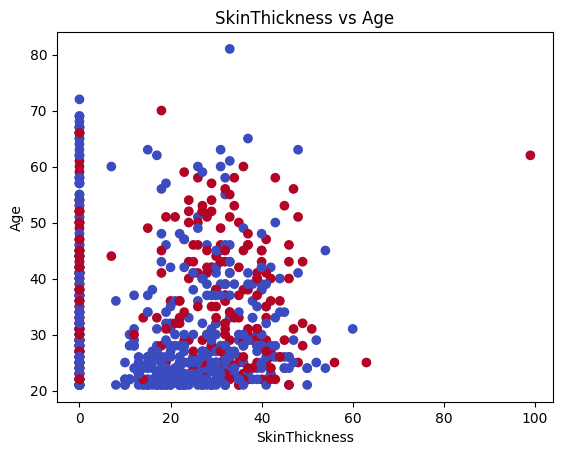

In [ ]:
plt.scatter(data['SkinThickness'], data['Age'], c=data['Outcome'], cmap='coolwarm')
plt.xlabel('SkinThickness')
plt.ylabel('Age')
plt.title('SkinThickness vs Age')
plt.show()

#### **2. Split the data (80/20).**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

#### **3. Train the Decision Tree model on the test data. Use 5-fold cross-validation method to find the best value for max_depth.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 20)}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_['max_depth'])

Best parameters:  3


#### **4. Plot max_depth with Accuracy scores.**

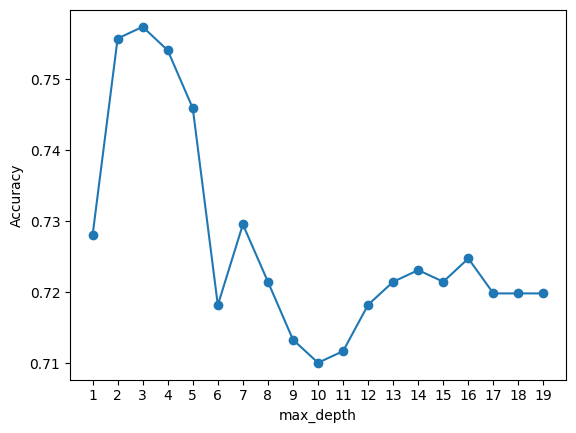

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

depths = range(1, 20)
scores = []

for depth in depths:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)
    score = cross_val_score(dtc, X_train, y_train, cv=5).mean()
    scores.append(score)

plt.plot(depths, scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20))
plt.show()

#### **5. Predict on the test data.**


In [ ]:
best_params = grid_search.best_params_
dt_model = DecisionTreeClassifier(max_depth=best_params['max_depth'], random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

#### **6. Evaluate the model (Accuracy, Precision, Recall).**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision = ", precision_score(y_test, y_pred))
print("Recall = ", recall_score(y_test, y_pred))

Accuracy = 0.7597402597402597
Precision =  0.68
Recall =  0.6181818181818182


#### **7. Explain and comment on your results**

In comparison to the accuracies attained by the SVM and KNN models, the Decision Tree model's accuracy score on the test data was 0.76, which indicates that the model can correctly predict the outcome for 76% of the test set. The model can properly identify a modest amount of genuine positive instances, according to its precision score of 0.68 indicates that when the model predicts that a person has diabetes, it is correct 68% of the time and recall score of 0.68 indicates that the model correctly identifies 68% of the people with diabetes in the test set, but it also produces a lot of false positive and false negative cases. This implies that the model might not be trustworthy for generating precise predictions based on fresh data.

When max_depth is set to 3 or 2, the model performs with the greatest accuracy, according to the plot of max_depth values and accuracy scores. This suggests that in this situation, a simpler model with a smaller maximum depth can be more useful since it prevents overfitting to the training data.

Overall, the Decision Tree model has the ability to predict diabetes outcomes, although it may not be as accurate as other models like KNN or SVM, and additional further tuning of the model parameters may be required to increase its effectiveness.